In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Join (pd.merge) Examples

In [2]:
cones = pd.DataFrame({
    'Flavor': np.array(['strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate']),
    'Price': np.array([3.55, 4.75, 6.55, 5.25, 5.75])}
)
cones

,Flavor,Price
0,strawberry,3.55
1,vanilla,4.75
2,chocolate,6.55
3,strawberry,5.25
4,chocolate,5.75


In [3]:
ratings = pd.DataFrame({
    'Flavor': np.array(['strawberry', 'chocolate', 'vanilla']),
    'Stars': np.array([2.5, 3.5, 4])}
)
ratings

,Flavor,Stars
0,strawberry,2.5
1,chocolate,3.5
2,vanilla,4.0


In [4]:
rated = cones.merge(ratings, on='Flavor')
# or pd.merge(cones,ratings, on='Flavor')
rated



,Flavor,Price,Stars
0,strawberry,3.55,2.5
1,strawberry,5.25,2.5
2,vanilla,4.75,4.0
3,chocolate,6.55,3.5
4,chocolate,5.75,3.5


In [5]:
ratings = pd.DataFrame({
    'Kind': np.array(['strawberry', 'chocolate', 'vanilla1']),
    'Stars': np.array([2.5, 3.5, 4])}
)
ratings

,Kind,Stars
0,strawberry,2.5
1,chocolate,3.5
2,vanilla1,4.0


In [6]:
rated = cones.merge(ratings, left_on='Flavor', right_on='Kind', how="inner")
rated


,Flavor,Price,Kind,Stars
0,strawberry,3.55,strawberry,2.5
1,strawberry,5.25,strawberry,2.5
2,chocolate,6.55,chocolate,3.5
3,chocolate,5.75,chocolate,3.5


In [7]:
rated['$/Star']= rated['Price'] / rated['Stars']

In [8]:
rated.sort_values('$/Star', ascending=False)

,Flavor,Price,Kind,Stars,$/Star
1,strawberry,5.25,strawberry,2.5,2.100000
2,chocolate,6.55,chocolate,3.5,1.871429
3,chocolate,5.75,chocolate,3.5,1.642857
0,strawberry,3.55,strawberry,2.5,1.420000


-----------------------------------------

In [9]:
drinks = pd.DataFrame([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]], columns=['Drink', 'Cafe', 'Price'],)
drinks

,Drink,Cafe,Price
0,Milk Tea,Tea One,4
1,Espresso,Nefeli,2
2,Latte,Nefeli,3
3,Espresso,Abe's,2


In [10]:
discounts = pd.DataFrame({
    'Coupon % off': np.array([25, 50, 5]),
    'Location': np.array(['Tea One', 'Nefeli', 'Tea One'])
    })
discounts

,Coupon % off,Location
0,25,Tea One
1,50,Nefeli
2,5,Tea One


In [11]:
combined = drinks.merge(discounts, left_on='Cafe', right_on= 'Location', how='inner')
combined

,Drink,Cafe,Price,Coupon % off,Location
0,Milk Tea,Tea One,4,25,Tea One
1,Milk Tea,Tea One,4,5,Tea One
2,Espresso,Nefeli,2,50,Nefeli
3,Latte,Nefeli,3,50,Nefeli


In [12]:
discounted_prices = combined['Price'] * (1 - combined['Coupon % off']/ 100)
combined['Discounted']= discounted_prices
combined

,Drink,Cafe,Price,Coupon % off,Location,Discounted
0,Milk Tea,Tea One,4,25,Tea One,3.0
1,Milk Tea,Tea One,4,5,Tea One,3.8
2,Espresso,Nefeli,2,50,Nefeli,1.0
3,Latte,Nefeli,3,50,Nefeli,1.5


## Join Examples: Tennis

Do women tennis players get penalized more than men for coaching violations?  Let's look at some data.

In [13]:
# Data on number of code violations at tennis Grand Slam tournaments, 1998-2018
men_violations = pd.read_csv('tennis_men_penalties.csv')
women_violations = pd.read_csv('tennis_women_penalties.csv')

In [14]:
men_violations

,Violation,Count (Men)
0,Racket Abuse,646
1,Audible Obscenity,344
2,Unsportsmanlike Conduct,287
3,Coaching,87
4,Ball Abuse,49
5,Verbal Abuse,62
6,Visible Obscenity,20
7,No Press,6
8,Time Violations,7
9,Best Effort,2


In [15]:
women_violations

,Violation,Count (Women)
0,Racket Abuse,99
1,Audible Obscenity,140
2,Unsportsmanlike Conduct,67
3,Coaching,152
4,Ball Abuse,35
5,Verbal Abuse,16
6,Visible Obscenity,11
7,No Press,10
8,Time Violations,3
9,Best Effort,0


In [16]:
combined = men_violations.merge(women_violations, on='Violation' )
combined

,Violation,Count (Men),Count (Women)
0,Racket Abuse,646,99
1,Audible Obscenity,344,140
2,Unsportsmanlike Conduct,287,67
3,Coaching,87,152
4,Ball Abuse,49,35
5,Verbal Abuse,62,16
6,Visible Obscenity,20,11
7,No Press,6,10
8,Time Violations,7,3
9,Best Effort,2,0


<AxesSubplot:ylabel='Violation'>

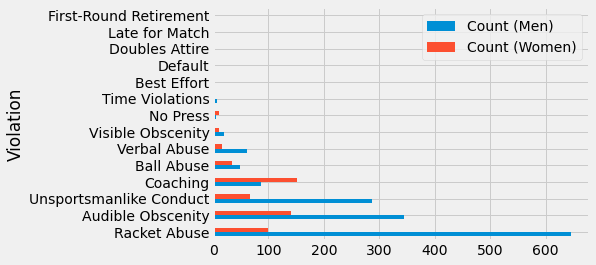

In [17]:
combined.plot.barh('Violation')

In [18]:
#Let's calcualate the violations per set so we can get a fair comparison
men_sets = 460
women_sets = 283
combined['Rate (Men)']= combined['Count (Men)'] / men_sets
combined['Rate (Women)']= combined['Count (Women)'] / women_sets
combined

,Violation,Count (Men),Count (Women),Rate (Men),Rate (Women)
0,Racket Abuse,646,99,1.404348,0.349823
1,Audible Obscenity,344,140,0.747826,0.494700
2,Unsportsmanlike Conduct,287,67,0.623913,0.236749
3,Coaching,87,152,0.189130,0.537102
4,Ball Abuse,49,35,0.106522,0.123675
5,Verbal Abuse,62,16,0.134783,0.056537
6,Visible Obscenity,20,11,0.043478,0.038869
7,No Press,6,10,0.013043,0.035336
8,Time Violations,7,3,0.015217,0.010601
9,Best Effort,2,0,0.004348,0.000000


<AxesSubplot:ylabel='Violation'>

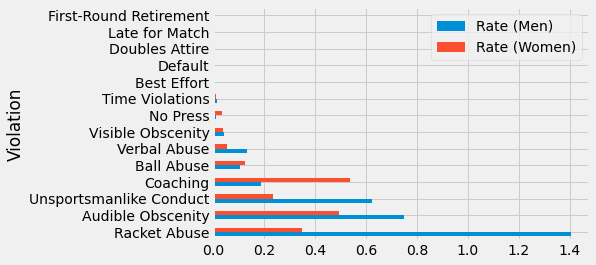

In [19]:
combined[['Violation','Rate (Men)','Rate (Women)']].plot.barh('Violation')

tennis_men_serving.csv:  stats on the top men players, sorted by how often they win when they are serving 

tennis_men_ranks.csv: The rankings of top 10 players are available

In [20]:
top_men = pd.read_csv('tennis_men_ranks.csv')
men_serving = pd.read_csv('tennis_men_serving.csv')

In [21]:
top_men

,Name,Rank
0,Rafael Nadal,1
1,Roger Federer,2
2,Novak Djokovic,3
3,Juan Martin del Potro,4
4,Alexander Zverev,5
5,Marin Cilic,6
6,Grigor Dimitrov,7
7,Dominic Thiem,8
8,Kevin Anderson,9
9,John Isner,10


In [22]:
men_serving

,Name,Percentage,Games Won,Total Games,Matches
0,John Isner,94.27,674,715,44
1,Roger Federer,93.11,527,566,42
2,Milos Raonic,90.38,451,499,38
3,Nick Kyrgios,89.98,422,469,32
4,Kevin Anderson,88.98,686,771,50
...,...,...,...,...,...
57,Adrian Mannarino,75.00,411,548,42
58,Diego Schwartzman,73.91,425,575,47
59,Benoit Paire,73.73,435,590,45
60,Nikoloz Basilashvili,72.62,374,515,41


In [23]:
men2 = top_men.merge(men_serving, on='Name')
men2

,Name,Rank,Percentage,Games Won,Total Games,Matches
0,Rafael Nadal,1,86.44,529,612,47
1,Roger Federer,2,93.11,527,566,42
2,Novak Djokovic,3,86.01,584,679,50
3,Juan Martin del Potro,4,87.48,622,711,54
4,Alexander Zverev,5,82.83,598,722,55
5,Marin Cilic,6,87.25,602,690,48
6,Grigor Dimitrov,7,81.55,442,542,38
7,Dominic Thiem,8,85.63,614,717,55
8,Kevin Anderson,9,88.98,686,771,50
9,John Isner,10,94.27,674,715,44


In [24]:
men2 = top_men.merge(men_serving, on='Name')[["Name","Rank", "Percentage"]]
men2

,Name,Rank,Percentage
0,Rafael Nadal,1,86.44
1,Roger Federer,2,93.11
2,Novak Djokovic,3,86.01
3,Juan Martin del Potro,4,87.48
4,Alexander Zverev,5,82.83
5,Marin Cilic,6,87.25
6,Grigor Dimitrov,7,81.55
7,Dominic Thiem,8,85.63
8,Kevin Anderson,9,88.98
9,John Isner,10,94.27


In [25]:
height = pd.read_csv('tennis_men_heights.csv')
height

,Name,Height
0,John Isner,82
1,Roger Federer,73
2,Milos Raonic,77
3,Nick Kyrgios,76
4,Kevin Anderson,80
5,Sam Querrey,78
6,Juan Martin del Potro,78
7,Marin Cilic,78
8,Rafael Nadal,73
9,Steve Johnson,74


In [26]:
men3 = men2.merge(height,on='Name')
men3

,Name,Rank,Percentage,Height
0,Rafael Nadal,1,86.44,73
1,Roger Federer,2,93.11,73
2,Novak Djokovic,3,86.01,74
3,Juan Martin del Potro,4,87.48,78
4,Alexander Zverev,5,82.83,78
5,Marin Cilic,6,87.25,78
6,Grigor Dimitrov,7,81.55,75
7,Dominic Thiem,8,85.63,73
8,Kevin Anderson,9,88.98,80
9,John Isner,10,94.27,82


<AxesSubplot:xlabel='Height', ylabel='Percentage'>

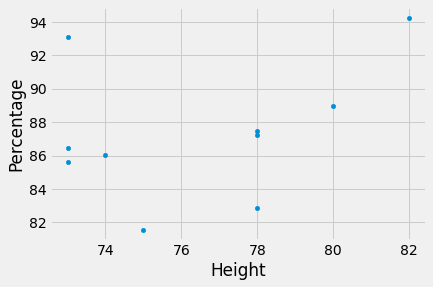

In [27]:
men3.plot.scatter('Height', 'Percentage')